In [393]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [394]:
import warnings
warnings.filterwarnings(action='ignore')

In [395]:
loan = pd.read_csv('loan.csv', low_memory=False)

In [396]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [397]:
loan.shape

(39717, 111)

In [398]:
#checking the data types of all columns
loan.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [399]:
#checking the null values for all columns
loan.isna().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


## 1. Cleaning the data

### 1.1 Handling missing values

In [400]:
# Some columns have all the rows with null values. We can remove these columns as they cannot be used to analyse.
# Removing columns which have all null values.
loan.dropna(axis=1, how = 'all', inplace = True)

In [401]:
loan.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [402]:
#deleting all columns with one unique values
loan = loan.loc[:, loan.nunique().values != 1]

In [403]:
loan.nunique()

id                         39717
member_id                  39717
loan_amnt                    885
funded_amnt                 1041
funded_amnt_inv             8205
term                           2
int_rate                     371
installment                15383
grade                          7
sub_grade                     35
emp_title                  28820
emp_length                    11
home_ownership                 5
annual_inc                  5318
verification_status            3
issue_d                       55
loan_status                    3
url                        39717
desc                       26527
purpose                       14
title                      19615
zip_code                     823
addr_state                    50
dti                         2868
delinq_2yrs                   11
earliest_cr_line             526
inq_last_6mths                 9
mths_since_last_delinq        95
mths_since_last_record       111
open_acc                      40
pub_rec   

In [404]:
loan.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [405]:
#Since we are only interested in the customers who have completed payment or
# defaulted on loan, we removw rows with loan status = 'Current'
loan.drop(loan[loan.loan_status == 'Current'].index, inplace = True)

In [406]:
loan.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [407]:
loan.isna().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2386
emp_length                  1033
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
url                            0
desc                       12527
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     24905
mths_since_last_record     35837
open_acc                       0
pub_rec   

In [408]:
loan.shape

(38577, 48)

In [409]:
loan.nunique()

id                         38577
member_id                  38577
loan_amnt                    870
funded_amnt                 1019
funded_amnt_inv             8050
term                           2
int_rate                     370
installment                15022
grade                          7
sub_grade                     35
emp_title                  28027
emp_length                    11
home_ownership                 5
annual_inc                  5215
verification_status            3
issue_d                       55
loan_status                    2
url                        38577
desc                       25803
purpose                       14
title                      19297
zip_code                     822
addr_state                    50
dti                         2853
delinq_2yrs                   11
earliest_cr_line             524
inq_last_6mths                 9
mths_since_last_delinq        95
mths_since_last_record       111
open_acc                      40
pub_rec   

### Columns to remove
#### 'next_pymnt_d' has 0 records
#### 'mths_since_last_record' has 92 % null values
#### 'out_prncp' and 'out_prncp_inv' have only one unique values
#### 'url', 'id', 'member_id', 'title', 'zip_code', 'desc' and 'emp_title' records does not provide any insights

In [410]:
remove_col = ['next_pymnt_d', 'mths_since_last_record', 'desc', 'out_prncp', 'out_prncp_inv', 'url', 'id', 'member_id', 'title', 'zip_code', 'emp_title']

In [411]:
loan.drop(labels= remove_col, axis = 1, inplace = True)

In [412]:
loan.shape

(38577, 37)

In [413]:
#checking null values in dataset
loan.isna().sum()

loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_length                  1033
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
purpose                        0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     24905
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    50
total_acc                      0
total_pymnt                    0
total_pymnt_inv                0
total_rec_prncp                0
total_rec_int                  0
total_rec_

In [414]:
loan.nunique()

loan_amnt                    870
funded_amnt                 1019
funded_amnt_inv             8050
term                           2
int_rate                     370
installment                15022
grade                          7
sub_grade                     35
emp_length                    11
home_ownership                 5
annual_inc                  5215
verification_status            3
issue_d                       55
loan_status                    2
purpose                       14
addr_state                    50
dti                         2853
delinq_2yrs                   11
earliest_cr_line             524
inq_last_6mths                 9
mths_since_last_delinq        95
open_acc                      40
pub_rec                        5
revol_bal                  21275
revol_util                  1088
total_acc                     82
total_pymnt                36714
total_pymnt_inv            36387
total_rec_prncp             6841
total_rec_int              34025
total_rec_

In [415]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,NaN,3,0,13648,83.70%,9,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,NaN,3,0,1687,9.40%,4,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,NaN,2,0,2956,98.50%,10,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,35.0,10,0,5598,21%,37,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,Nov-04,3,NaN,9,0,7963,28.30%,12,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0


In [416]:
# checking unique values of 'purpose'
loan.purpose.value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

In [417]:
# checking the loan status where values are not missing in 'mths_since_last_delinq'
loan[~loan.mths_since_last_delinq.isnull()]['loan_status'].value_counts()

Fully Paid     11530
Charged Off     2142
Name: loan_status, dtype: int64

#### The proportion of loan status where 'mths_since_last_delinq' is null is 21420/3485 = 6.14
#### The proportion of loan status where 'mths_since_last_delinq' is not null is 11530/2142 = 5.38
#### This infers that customers who has been delinquent in the past have 14% more probabilties to default.

In [418]:
loan[loan.last_pymnt_d.isna()]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
26,15000,15000,8725.0,36 months,14.27%,514.64,C,C2,9 years,RENT,60000.0,Not Verified,Dec-11,Charged Off,debt_consolidation,NY,15.22,0,Oct-03,1,NaN,7,0,5872,57.60%,11,0.00,0.00,0.0,0.0,0.0,0.00,0.0000,NaN,0.0,May-16,0.0
2724,8000,8000,3975.0,36 months,14.65%,275.96,C,C3,10+ years,RENT,72000.0,Source Verified,Nov-11,Charged Off,debt_consolidation,NC,22.28,0,Nov-97,1,NaN,10,0,32955,85.80%,31,0.00,0.00,0.0,0.0,0.0,0.00,0.0000,NaN,0.0,May-16,0.0
3613,6400,6400,6400.0,60 months,18.25%,163.39,D,D5,5 years,RENT,33000.0,Source Verified,Nov-11,Charged Off,major_purchase,OH,9.05,0,Jun-06,3,25.0,4,0,2237,60.50%,6,366.75,366.75,0.0,0.0,0.0,366.75,66.0150,NaN,0.0,Apr-12,0.0
3985,18000,18000,18000.0,60 months,19.03%,467.23,E,E2,4 years,RENT,36000.0,Verified,Nov-11,Charged Off,debt_consolidation,CT,5.43,0,Aug-08,1,NaN,13,0,4545,18.60%,17,0.00,0.00,0.0,0.0,0.0,0.00,0.0000,NaN,0.0,Apr-16,0.0
4206,1800,1800,1800.0,36 months,8.90%,57.16,A,A5,9 years,RENT,50400.0,Not Verified,Nov-11,Charged Off,wedding,CA,2.64,0,Oct-98,1,NaN,3,0,1930,16.10%,10,1800.00,1800.00,0.0,0.0,0.0,1800.00,0.0000,NaN,0.0,May-16,0.0
4803,1500,1500,1500.0,36 months,16.29%,52.96,D,D1,1 year,RENT,27000.0,Not Verified,Oct-11,Charged Off,wedding,GA,18.53,0,Sep-07,2,NaN,9,0,743,26.50%,12,86.05,86.05,0.0,0.0,0.0,86.05,15.4890,NaN,0.0,Apr-12,0.0
5716,2000,2000,2000.0,36 months,7.51%,62.23,A,A3,4 years,RENT,18000.0,Not Verified,Oct-11,Charged Off,other,CA,16.73,0,Jul-04,0,NaN,5,0,2925,33.20%,20,89.89,89.89,0.0,0.0,0.0,89.89,0.8700,NaN,0.0,Mar-12,0.0
6253,1400,1400,1400.0,36 months,8.90%,44.46,A,A5,8 years,MORTGAGE,28800.0,Not Verified,Oct-11,Charged Off,debt_consolidation,TX,22.25,1,Feb-06,1,9.0,6,0,612,29.10%,26,62.86,62.86,0.0,0.0,0.0,62.86,0.5900,NaN,0.0,Sep-15,0.0
6259,30000,30000,7100.0,60 months,19.03%,778.72,E,E2,10+ years,MORTGAGE,51600.0,Verified,Oct-11,Charged Off,debt_consolidation,TX,19.09,0,Dec-99,3,NaN,9,0,22880,83.50%,48,1719.57,406.96,0.0,0.0,0.0,1719.57,309.5226,NaN,0.0,Mar-12,0.0
6768,4000,4000,3975.0,60 months,19.03%,103.83,E,E2,< 1 year,RENT,19200.0,Source Verified,Sep-11,Charged Off,debt_consolidation,MO,12.75,0,Aug-99,3,NaN,6,0,3887,82.70%,7,179.57,178.45,0.0,0.0,0.0,179.57,1.6600,NaN,0.0,Mar-12,0.0


#### The type of customers with no last payment date are the riskiest as they have not paid any installment and defaulted on full loan amount

In [419]:
loan[loan.last_credit_pull_d.isna()]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
26025,5000,5000,5000.0,36 months,11.12%,163.98,B,B3,5 years,RENT,96000.0,Not Verified,Sep-10,Charged Off,small_business,CA,4.04,0,Oct-97,0,NaN,4,0,7172,80.60%,9,3362.960000,3362.96,2553.55,702.45,0.0,106.96,1.34,Jun-12,163.98,NaN,0.0
39476,1000,1000,875.0,36 months,7.12%,30.94,A,A1,< 1 year,MORTGAGE,120000.0,Not Verified,Dec-07,Fully Paid,other,CA,0.65,0,Jul-97,1,0.0,7,0,2227,3.80%,37,1110.813028,971.96,1000.00,110.81,0.0,0.00,0.00,Aug-10,185.80,NaN,NaN


#### There are only two records with 'last_credit_pull_d' as null values. Remving those column.

In [420]:
loan.dropna(subset=['last_credit_pull_d'], inplace=True)

In [421]:
loan[loan.pub_rec_bankruptcies.isna()]['loan_status'].value_counts()

Fully Paid     578
Charged Off    118
Name: loan_status, dtype: int64

In [422]:
loan.pub_rec_bankruptcies.value_counts()

0.0    36237
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [423]:
# since 'pub_rec_bankruptcies' feature has mode = 0.0, null values will be imputed with it.
loan['pub_rec_bankruptcies'].fillna(value = 0, inplace=True)

In [424]:
loan.pub_rec_bankruptcies.isna().sum()

0

#### The features 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'collection_recovery_fee' and 'last_pymnt_amnt' are the details of payments by customer. These features can be dropped as we could not infer the behaviour of customer with these.

In [425]:
# Dropping irrelevant features
remove_col = ['total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'collection_recovery_fee', 'last_pymnt_amnt' ]
loan.drop(labels=remove_col, axis=1, inplace=True)

In [426]:
loan.shape

(38575, 30)

In [427]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,recoveries,last_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,NaN,3,0,13648,83.70%,9,0.00,Jan-15,May-16,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,NaN,3,0,1687,9.40%,4,117.08,Apr-13,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,NaN,2,0,2956,98.50%,10,0.00,Jun-14,May-16,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,35.0,10,0,5598,21%,37,0.00,Jan-15,Apr-16,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,Nov-04,3,NaN,9,0,7963,28.30%,12,0.00,Jan-15,Jan-16,0.0


In [428]:
loan.dropna(subset=['revol_util'], inplace=True)

In [429]:
loan.revol_util.isna().sum()

0

### 1.2 Extracting appropriate values from features and correcting data types

In [430]:
#extracting information from feature 'term'
loan['term'].value_counts()

 36 months    29047
 60 months     9478
Name: term, dtype: int64

In [431]:
loan['term'] = loan['term'].apply(lambda x: int(x.split()[0]))

In [432]:
loan['term'].head()

0    36
1    60
2    36
3    36
5    36
Name: term, dtype: int64

In [433]:
# renaming 'term' to 'term in months'
loan.rename(columns = {'term' : 'term_in_months'}, inplace= True)

In [434]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term_in_months,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,recoveries,last_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,NaN,3,0,13648,83.70%,9,0.00,Jan-15,May-16,0.0
1,2500,2500,2500.0,60,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,NaN,3,0,1687,9.40%,4,117.08,Apr-13,Sep-13,0.0
2,2400,2400,2400.0,36,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,NaN,2,0,2956,98.50%,10,0.00,Jun-14,May-16,0.0
3,10000,10000,10000.0,36,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,35.0,10,0,5598,21%,37,0.00,Jan-15,Apr-16,0.0
5,5000,5000,5000.0,36,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,Nov-04,3,NaN,9,0,7963,28.30%,12,0.00,Jan-15,Jan-16,0.0


In [435]:
#cleaning 'int_rate' feature
loan['int_rate'] = loan['int_rate'].apply(lambda x: float(x[:-1]))

In [436]:
loan['int_rate'].head()

0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: float64

In [437]:
loan['revol_util'] = loan['revol_util'].apply(lambda x: float(x[:-1]))

In [438]:
loan['revol_util'].head()

0    83.7
1     9.4
2    98.5
3    21.0
5    28.3
Name: revol_util, dtype: float64

In [439]:
# renaming 'revol_util' to 'revol_util_percent'
loan.rename(columns = {'revol_util' : 'revol_util_percent'}, inplace= True)

In [440]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term_in_months,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util_percent,total_acc,recoveries,last_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,NaN,3,0,13648,83.7,9,0.00,Jan-15,May-16,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,NaN,3,0,1687,9.4,4,117.08,Apr-13,Sep-13,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,NaN,2,0,2956,98.5,10,0.00,Jun-14,May-16,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,35.0,10,0,5598,21.0,37,0.00,Jan-15,Apr-16,0.0
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,Nov-04,3,NaN,9,0,7963,28.3,12,0.00,Jan-15,Jan-16,0.0


In [441]:
loan.isna().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term_in_months                0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1030
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq    24867
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util_percent            0
total_acc                     0
recoveries                    0
last_pymnt_d                 67
last_credit_pull_d            0
pub_rec_bankruptcies          0
dtype: int64

In [442]:
loan['emp_length'].dtype

dtype('O')

In [443]:
# cleaning 'emp_length'
loan['emp_length'] = loan['emp_length'].apply(lambda x: str(x).rstrip(' years'))

In [444]:
# changing 'emp_length' to 'emp_length_in_years'
loan.rename(columns = {'emp_length' : 'emp_length_in_years'}, inplace= True)

In [445]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term_in_months,int_rate,installment,grade,sub_grade,emp_length_in_years,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util_percent,total_acc,recoveries,last_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10+,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,NaN,3,0,13648,83.7,9,0.00,Jan-15,May-16,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,NaN,3,0,1687,9.4,4,117.08,Apr-13,Sep-13,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10+,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,NaN,2,0,2956,98.5,10,0.00,Jun-14,May-16,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10+,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,35.0,10,0,5598,21.0,37,0.00,Jan-15,Apr-16,0.0
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,Nov-04,3,NaN,9,0,7963,28.3,12,0.00,Jan-15,Jan-16,0.0


In [446]:
#checking datatypes of all columns
loan.dtypes

loan_amnt                   int64
funded_amnt                 int64
funded_amnt_inv           float64
term_in_months              int64
int_rate                  float64
installment               float64
grade                      object
sub_grade                  object
emp_length_in_years        object
home_ownership             object
annual_inc                float64
verification_status        object
issue_d                    object
loan_status                object
purpose                    object
addr_state                 object
dti                       float64
delinq_2yrs                 int64
earliest_cr_line           object
inq_last_6mths              int64
mths_since_last_delinq    float64
open_acc                    int64
pub_rec                     int64
revol_bal                   int64
revol_util_percent        float64
total_acc                   int64
recoveries                float64
last_pymnt_d               object
last_credit_pull_d         object
pub_rec_bankru

#### Some of the features have categorised variable. Converting the datatypes to categories.
#### Also few features shows date. Converting them to datetime category.

In [447]:
#converting datatypes
category_col = ['grade', 'sub_grade', 'emp_length_in_years', 'home_ownership', 'verification_status', 'loan_status',
               'purpose', 'addr_state']
datetime_col = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']

In [448]:
loan[category_col] = loan[category_col].astype('category')

In [449]:
import datetime as dt

In [450]:
#loan[datetime_col] = pd.to_datetime(loan[datetime_col], format='%b-%y')

In [451]:
loan.dtypes

loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term_in_months               int64
int_rate                   float64
installment                float64
grade                     category
sub_grade                 category
emp_length_in_years       category
home_ownership            category
annual_inc                 float64
verification_status       category
issue_d                     object
loan_status               category
purpose                   category
addr_state                category
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
mths_since_last_delinq     float64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util_percent         float64
total_acc                    int64
recoveries                 float64
last_pymnt_d                object
last_credit_pull_d  

In [452]:
loan.shape

(38525, 30)

## 2. Univariate Analysis

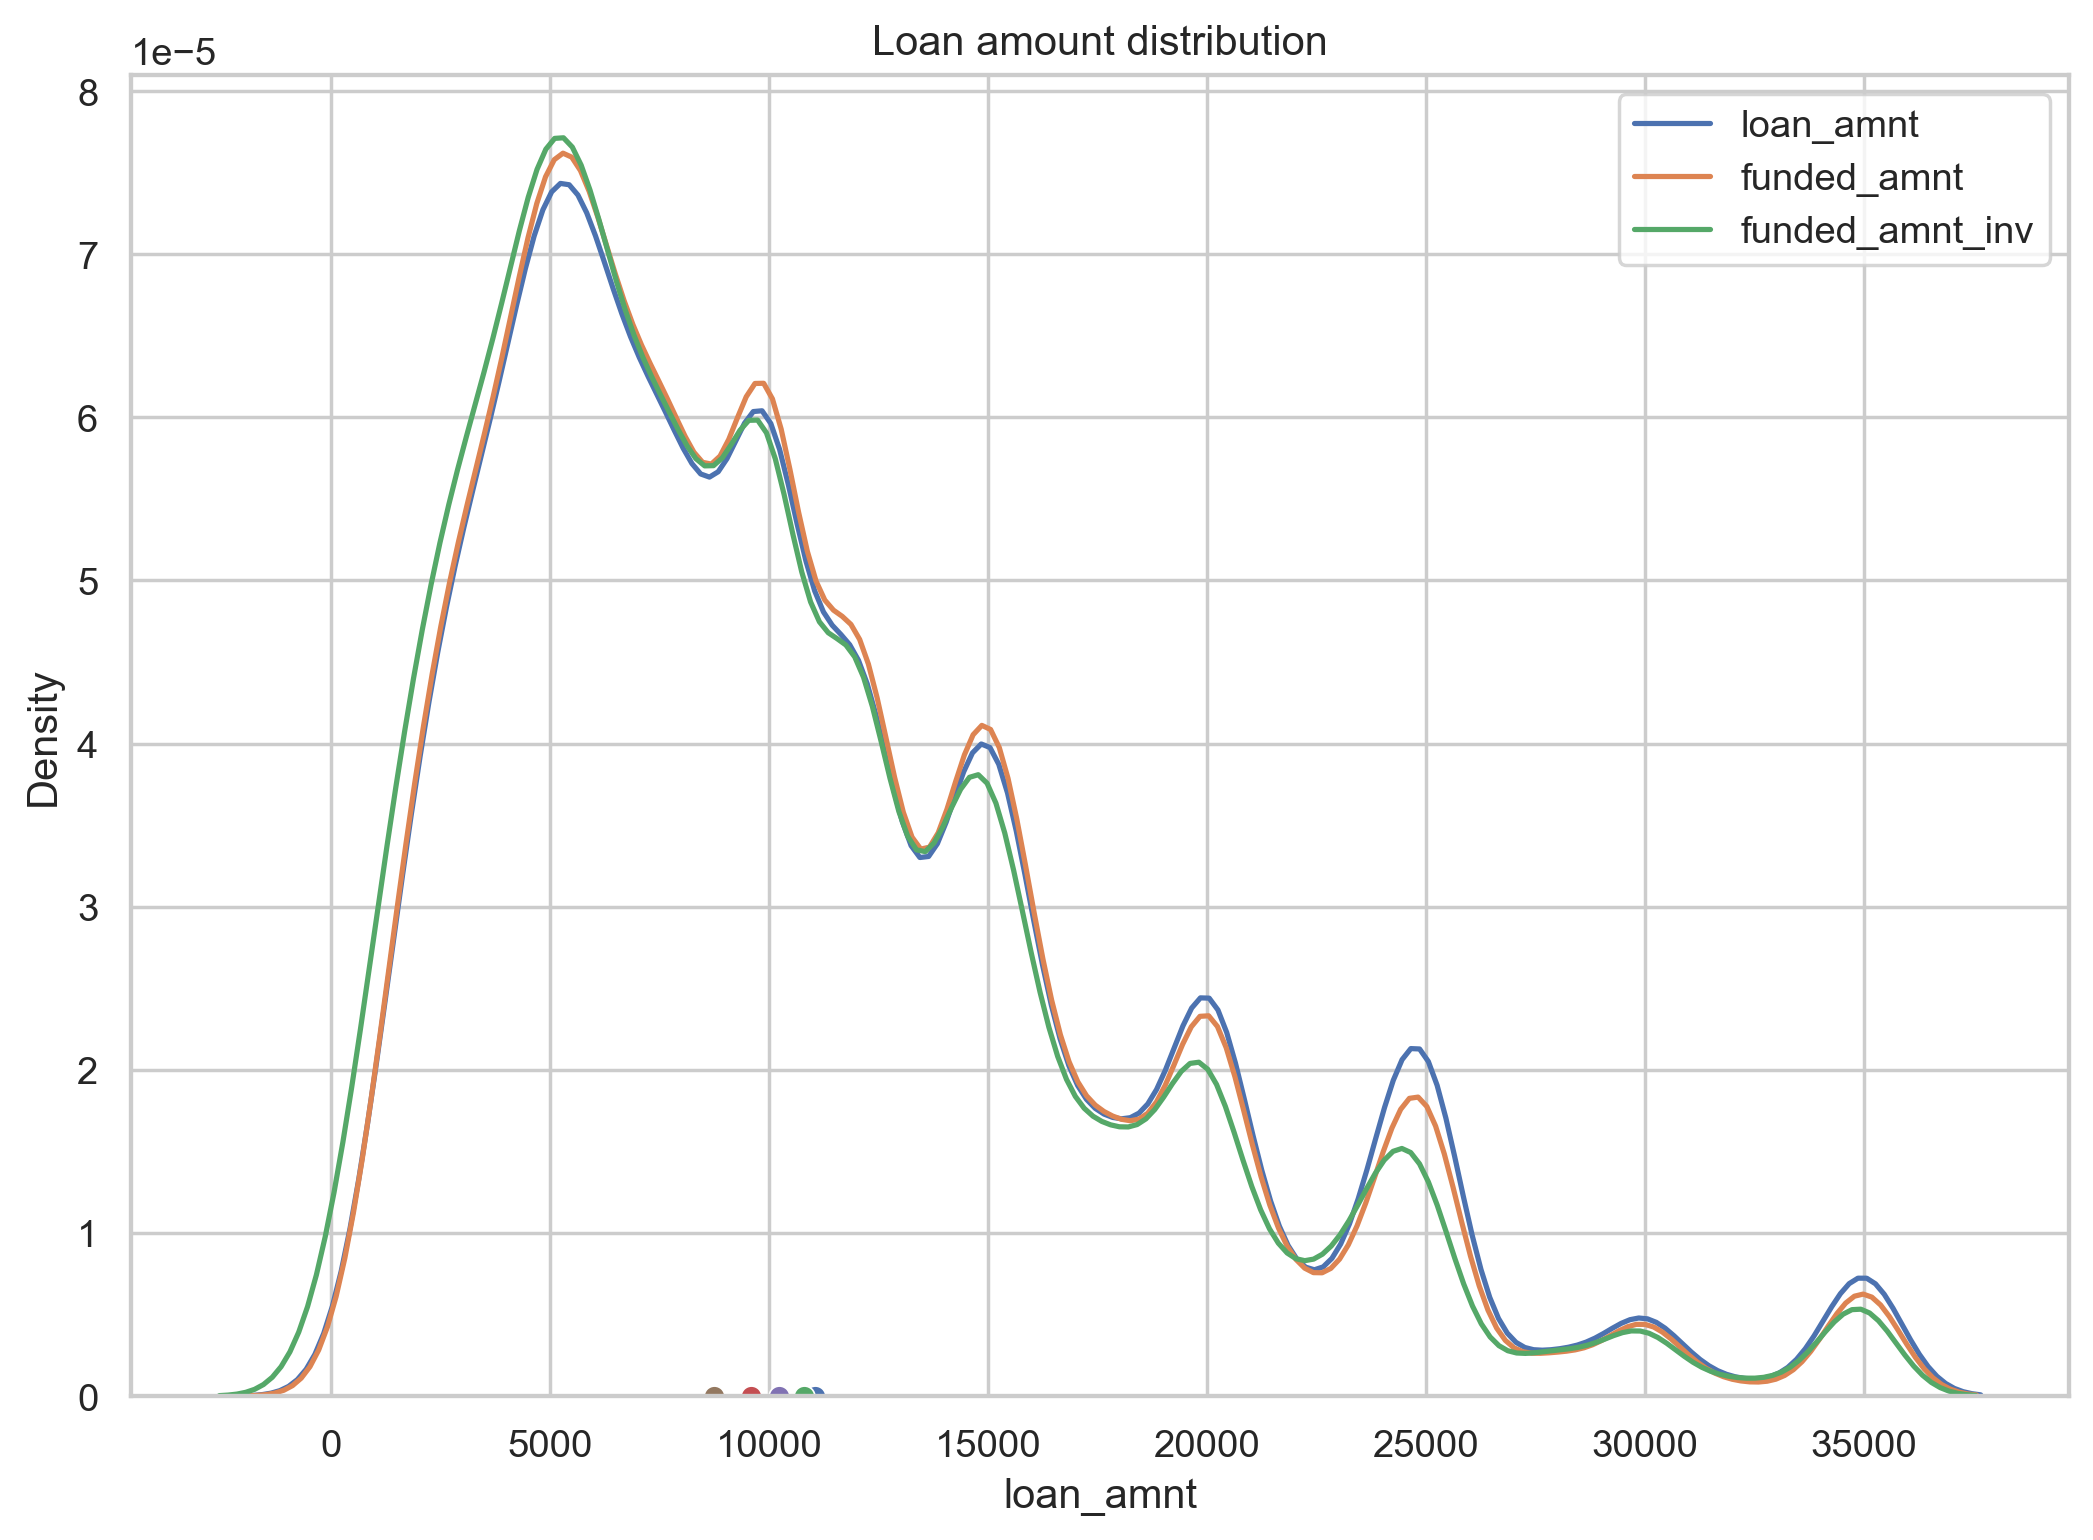

In [486]:
# checking distribution of loan_amnt, funded_amnt, funded_amnt_inv
funding_variable = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv']
plt.figure(figsize=(10,7), dpi = 250)
for i,j in enumerate(funding_variable):
    mean = loan[j].mean()
    median = loan[j].median()
    mini = np.min(loan[j])
    maxi = np.max(loan[j])
    
    #ax = plt.subplot(1,3,i+1)
    sns.kdeplot(loan[j])
    sns.scatterplot([mean],[0])
    sns.scatterplot([median],[0])
plt.title('Loan amount distribution')
plt.legend(funding_variable)
plt.savefig('loan_amt_distribution')
plt.show()

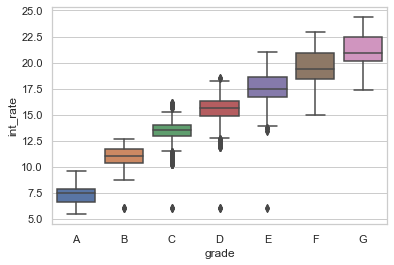

In [481]:
#interest rate distribution for different grades
sns.boxplot(data = loan, x = 'grade', y = 'int_rate')
plt.title('Distribution of grade and interest rate')
plt.savefig('Grade_Uni')
plt.show()

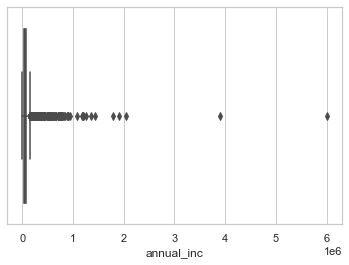

In [455]:
#Checking distribution of annual income of customers
sns.boxplot(loan['annual_inc'])
plt.show()

In [456]:
loan['annual_inc'].describe()

count    3.852500e+04
mean     6.880719e+04
std      6.421591e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.900000e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

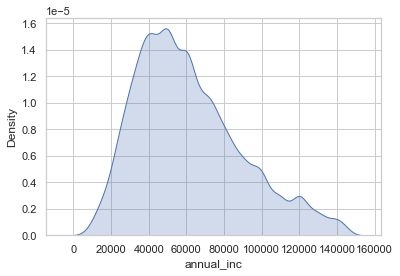

In [457]:
# removing outliers for analysis (above 1.5 times of IQR + 75th percentile value)
income_iqr = np.percentile(loan['annual_inc'], 75) - np.percentile(loan['annual_inc'], 25)
#calculatin above limit for income
income_limit = np.percentile(loan['annual_inc'], 75) + 1.5*income_iqr

#distribution of income after removing outliers
sns.kdeplot(data = loan[loan['annual_inc'] <= income_limit], x = 'annual_inc', shade=True)
plt.show()

- Majority of people have annual income between 20000 and 100000
- There are few outliers where income is very high.

In [458]:
# numerical description of interest rate for all grades
grade_list =loan['grade'].unique().to_list()
grade_list.sort()
for grade in grade_list:
    print('Grade: ' + grade)
    print(loan[loan['grade'] == grade]['int_rate'].describe())
    print()

Grade: A
count    10044.000000
mean         7.331000
std          1.032058
min          5.420000
25%          6.620000
50%          7.490000
75%          7.900000
max          9.630000
Name: int_rate, dtype: float64

Grade: B
count    11673.000000
mean        11.007804
std          0.899453
min          6.000000
25%         10.370000
50%         10.990000
75%         11.710000
max         12.690000
Name: int_rate, dtype: float64

Grade: C
count    7820.000000
mean       13.534224
std         0.935569
min         6.000000
25%        12.990000
50%        13.490000
75%        13.990000
max        16.110000
Name: int_rate, dtype: float64

Grade: D
count    5069.000000
mean       15.662780
std         1.162664
min         6.000000
25%        14.910000
50%        15.620000
75%        16.320000
max        18.490000
Name: int_rate, dtype: float64

Grade: E
count    2652.000000
mean       17.631629
std         1.355678
min         6.000000
25%        16.690000
50%        17.510000
75%        18

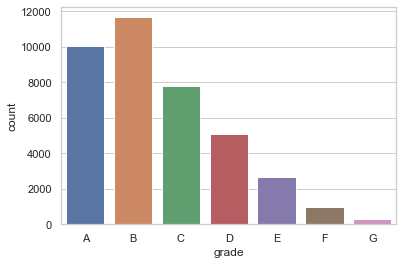

In [459]:
# Count of customers based on the rate of interest the loan has been disbursed.
sns.countplot(loan['grade'])
plt.show()

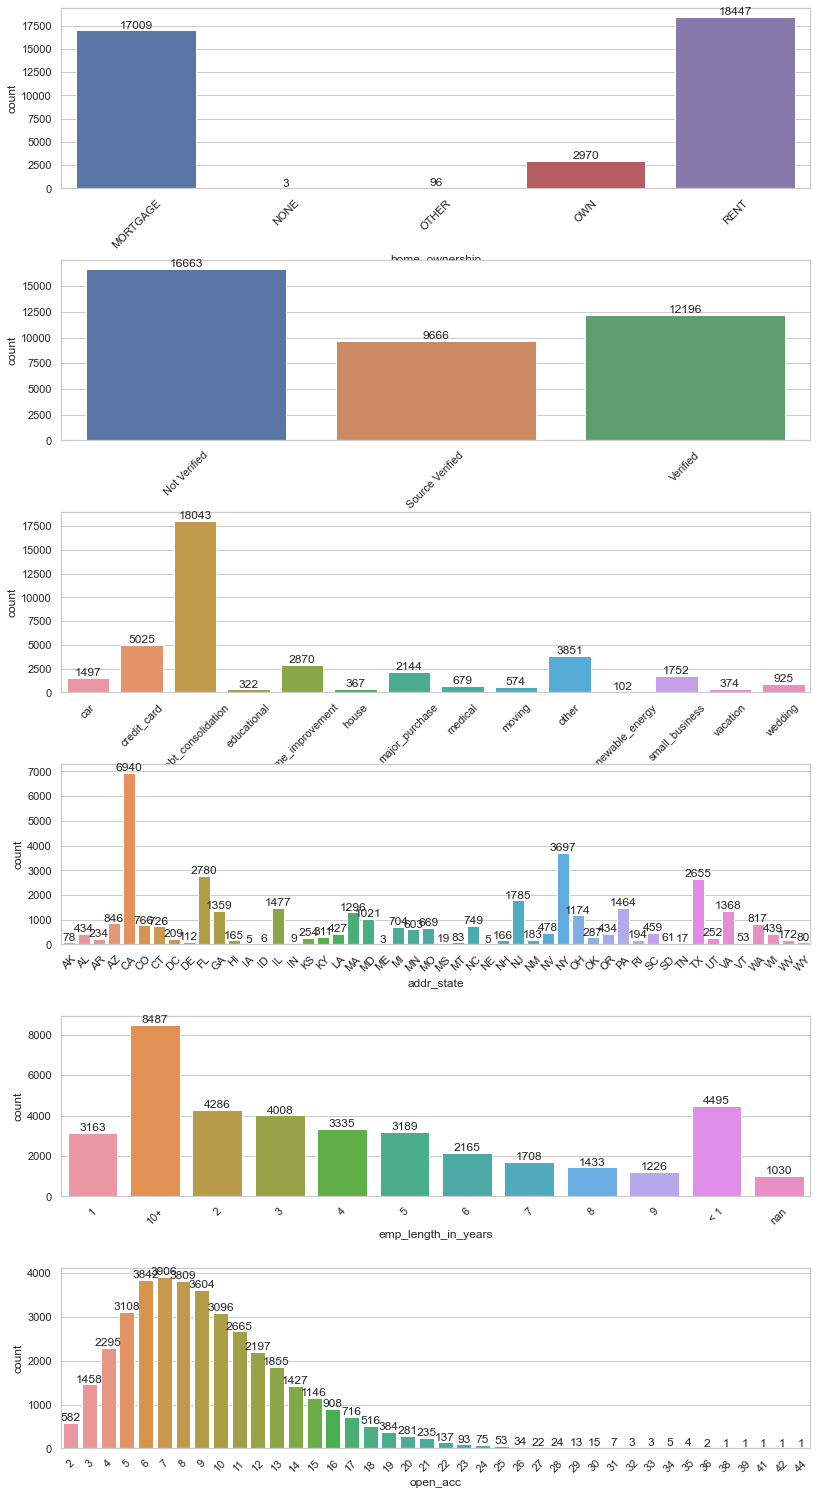

In [489]:
#identifying number of customers based on demography, home ownership, purpose of loan and verification status.
# These are the attributes of customer which are available before issuance of loan
attributes_col = ['home_ownership', 'verification_status', 'purpose', 'addr_state', 'emp_length_in_years', 'open_acc']
plt.figure(figsize=(13,20))
for i, attr in enumerate(attributes_col):
    ax = plt.subplot(6,1,i+1)
    sns.countplot(loan[attr])
    ax.bar_label(ax.containers[0])
    plt.xticks(rotation=45)
    plt.subplots_adjust(left=0.1,
                    bottom=0.2,  
                    top=1.2, 
                    wspace=0.4, 
                    hspace=0.4)
    plt.savefig(attr)
plt.show()


#### From the above plots we can derive following inference
- Most of the people who had applied for loan either live on rent, or they had mortaged home.
- Majority of loan is applied for the purpose of debt consolidation and credit card payment. Home improvement and major purchases being other popular reason for loan application.
- Most applicants are from California state, followed by New York and Texas.
- Majority of the applicants are vastly experienced professional having more than 10 years of experience, or are newly joined professional having less than one year of experience.
- Most of the people have mutliple credit lines linked with them, most common being between 5 and 10. There are few outliers, but their count is limited.

## Bivariate Analysis

### Checking the relationship of loan status with funded amount.

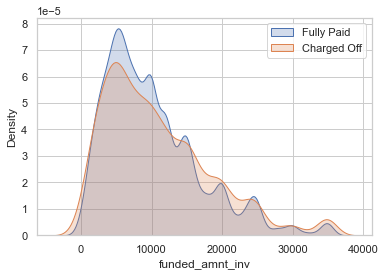

In [461]:
sns.kdeplot(data = loan[loan['loan_status'] == 'Fully Paid'], x = 'funded_amnt_inv', shade=True)
sns.kdeplot(data = loan[loan['loan_status'] == 'Charged Off'], x = 'funded_amnt_inv', shade = True)
plt.legend(['Fully Paid', 'Charged Off'])
plt.show()

#### As the funding amount increases, there is a slight increase in the proportion of people defaulting on loan

In [483]:
#Creating a function to analyse different variable of loan dataset with the loan status variable

def prop_plot(data, feature, title):
    #creating list of unique values of feature of dataset
    values_list = data[feature].unique().to_list()
    values_list.sort()
    value_prop = {}
    for value in values_list:
        prop = len(data[(data[feature] == value) & (data['loan_status'] == 'Charged Off')].index) / len(data[(data[feature] == value)
                                                                                                  & (data['loan_status'] == 'Fully Paid')].index) * 100
        value_prop[value] = (round(prop,2))

    sns.set_theme(style='whitegrid')
    ax = sns.barplot(x = list(value_prop.keys()), y = list(value_prop.values()), palette='colorblind')
    ax.bar_label(ax.containers[0])
    plt.xlabel(feature)
    plt.ylabel('percent value')
    plt.xticks(rotation = 45)
    plt.title('Proportion of people defaulting vs ' + title)
    #plt.show()

### Relationship between employee work experience and loan status

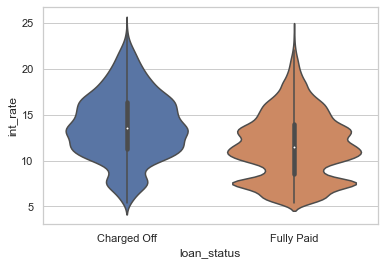

In [463]:
# distribution of interest rate at which loan was issue for each loan status category.
sns.violinplot(data = loan, x = 'loan_status', y = 'int_rate')
plt.show()

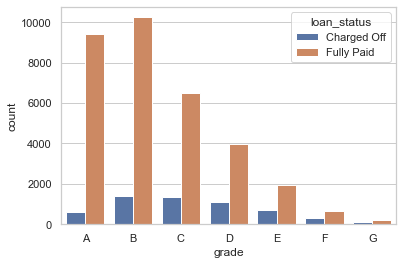

In [464]:
sns.countplot(data = loan, x = 'grade', hue = 'loan_status')
plt.show()

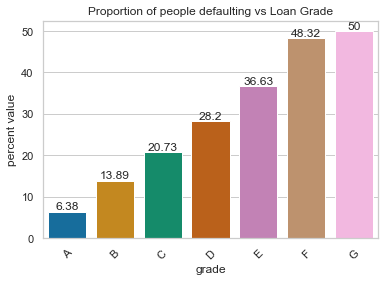

In [485]:
prop_plot(loan, 'grade', 'Loan Grade')
plt.savefig('grade_vs_loan_status')

#### Inferences drawn from above plot
- For lower interest rate the proportion of people defaulting on loan is less.
- As the interest rate moves above 12-13%, the proportion of people defaulting on loan increases.
- For loan grade F and G, almost half of the people have defaulted on their loan.

### Relationship between employee work experience and loan status

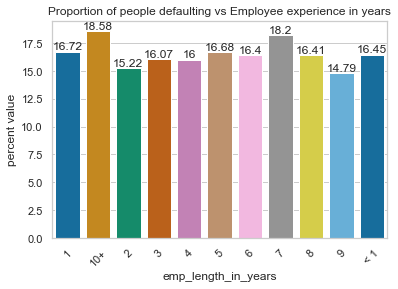

In [490]:
prop_plot(loan[loan['emp_length_in_years'] != 'nan'],'emp_length_in_years', 'Employee experience in years')
plt.savefig('employee_experience')

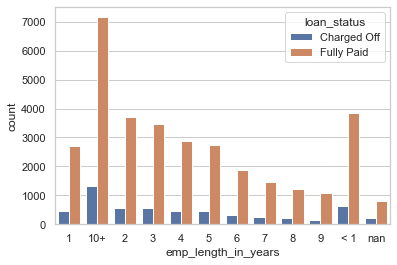

In [467]:
sns.countplot(data = loan, x = 'emp_length_in_years', hue = 'loan_status')
plt.show()

#### Inferences drawn from above plot
- There is small difference in the people defaulting on loan based on their years of experience.
- Employee having experience more than 10 years show highest default rate of 18.58%.
- Employees having experience of 7 years also shows high default rate when compared to others (18.2%).

### Relationship between employee work experience and loan status

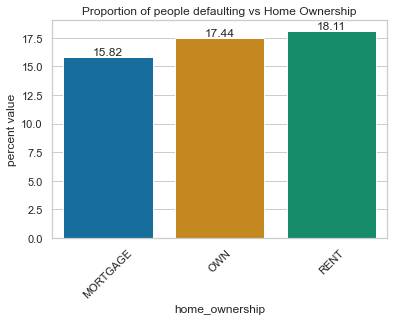

In [492]:
prop_plot(loan[loan['home_ownership'].isin(['MORTGAGE', 'RENT', 'OWN'])], 'home_ownership', 'Home Ownership')
plt.savefig('home_ownership')

#### People who are in rent have higher tendencies to default on loan

### Relationship between loan application purpose and loan status

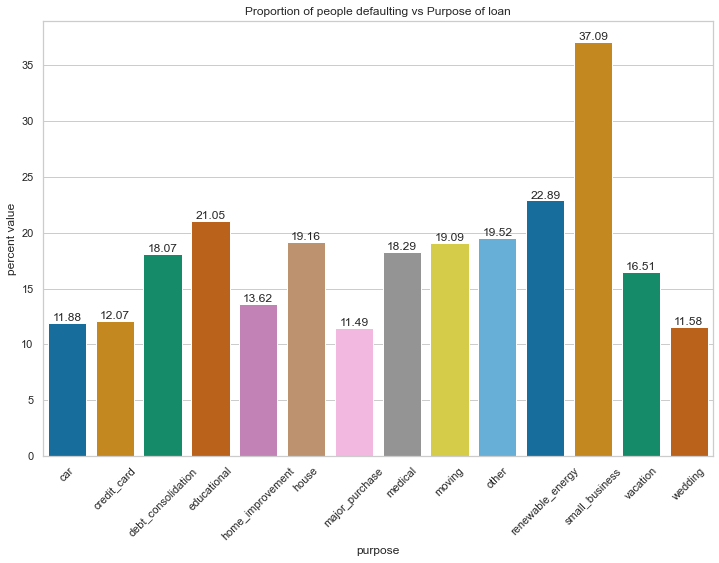

In [493]:
plt.figure(figsize=(12,8))
prop_plot(loan, 'purpose', 'Purpose of loan')
plt.savefig('purpose')

- People who have taken loan for purpose of small business show maximum default rate of 37.09%. It is followed by renewable energy (22.89%), and for educational purpose (21.05%).
- People taking loan for car, credit card, major purchase and wedding show least tendency to default on loan.

### Relationship between state residency of customer and loan status

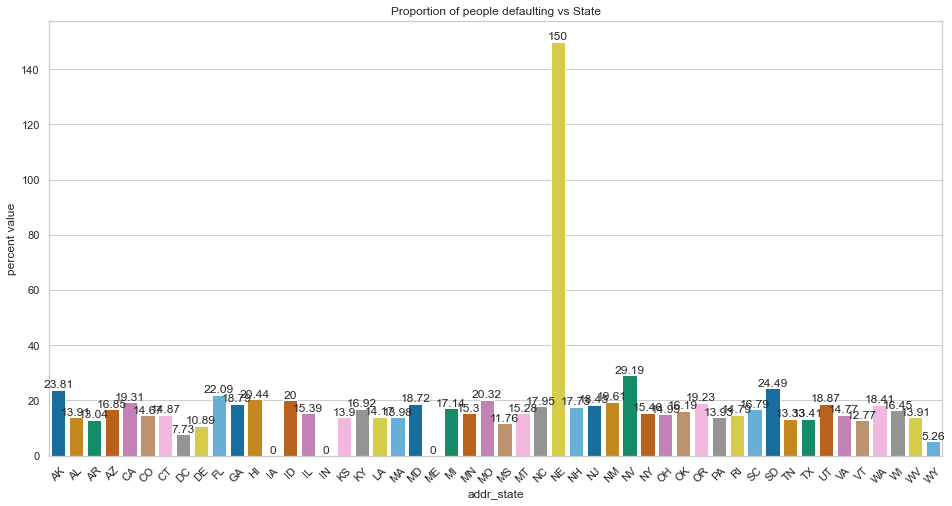

In [470]:
plt.figure(figsize=(16,8))
prop_plot(loan, 'addr_state', 'State')


In [471]:
# Since the state NE has only 5 customers, the plot above does not present true picture.
# filtering all state where count is atleast 100.

state_count = pd.pivot_table(data=loan, index='addr_state', aggfunc='size')
state_count = pd.DataFrame(state_count)
state_count = state_count[state_count[0] >= 100]

In [472]:
state_above_100 = state_count.index.to_list()

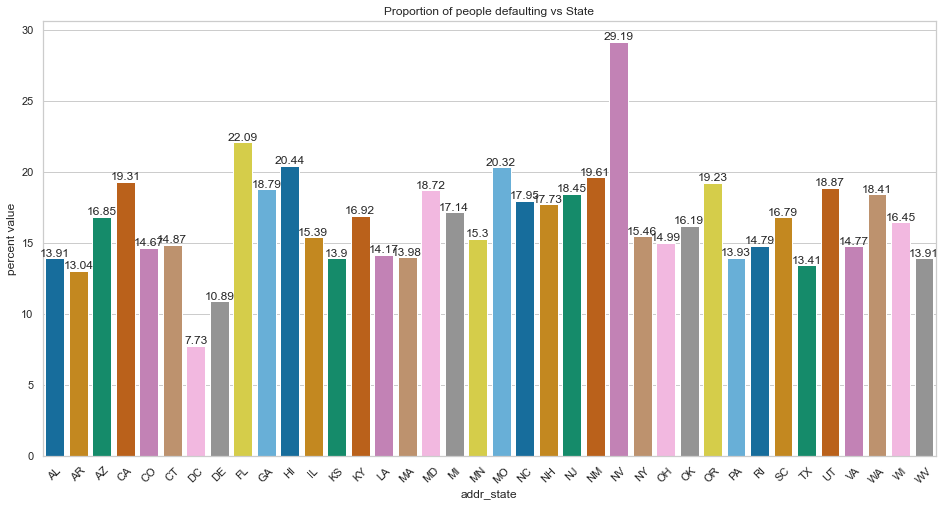

In [494]:
plt.figure(figsize=(16,8))
prop_plot(loan[loan['addr_state'].isin(state_above_100)], 'addr_state', 'State')
plt.savefig('addr_state_prop')

#### Inferences drawn from the above state
- The plot shows the proportion of defaulter against non-defaulters for each state with a minimum of 100 customers.
- State of Nevada(NV) shows highest proportion of defaulter (29.19%)
- Other states with prominent default rates are Florida (22.09%), Hawaii(20.44%) and Missouri (20.32%).
- State of Washington DC and State of Delaware shows lowest default rate with 7.73% and 10.89% respectively.

### Relationship between mths_since_last_delinq and loan status

In [474]:
# Records of customer who doesnt have any delinquency record
no_past_delinq = loan[(loan['mths_since_last_delinq'].isna() & loan['mths_since_last_delinq'] == 0.0)]['loan_status']

# Records of customer who have atleast one delinquency record
past_delinq = loan[~(loan['mths_since_last_delinq'].isna()) & loan['mths_since_last_delinq'] != 0.0]['loan_status']

In [475]:
#percent of people defaulting on loan who have no past delinquency records.
no_past_delinq =((no_past_delinq == 'Charged Off').sum())/len(no_past_delinq)
round(no_past_delinq*100, 2)

14.56

In [476]:
#percent of people defaulting on loan who have past delinquency records.
past_delinq =((past_delinq == 'Charged Off').sum())/len(past_delinq)
round(past_delinq*100, 2)

15.66

- The person who have atleast one past delinquency record have higher chance of defaulting on loan.

### Relationship between total credit lines('total_acc') and loan status

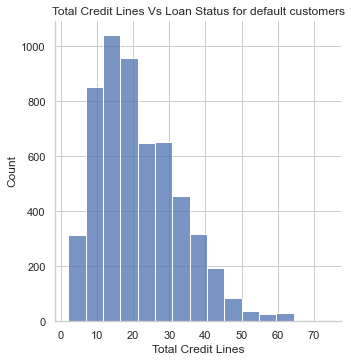

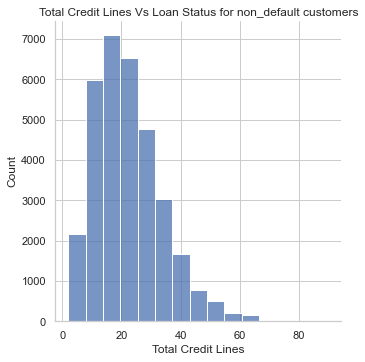

In [477]:
sns.displot(data = loan[loan['loan_status'] == 'Charged Off'], x = 'total_acc', bins=15)
plt.title('Total Credit Lines Vs Loan Status for default customers')
plt.xlabel('Total Credit Lines')

sns.displot(data = loan[loan['loan_status'] == 'Fully Paid'], x = 'total_acc', bins=15)
plt.title('Total Credit Lines Vs Loan Status for non_default customers')
plt.xlabel('Total Credit Lines')
plt.show()

- The distribtion of customers is similar for defaulters as well for non-defaulters. Thus credit lines does not provide strong indication of customer behavior.

### Relationship between employee salary and loan status

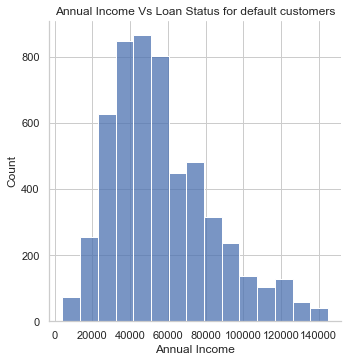

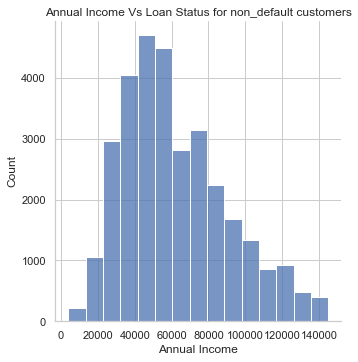

In [488]:
# Checking distribution of employee salary after removing outliers for each loan status category

loan1 = loan[loan['annual_inc'] <= income_limit]
sns.displot(data = loan1[loan1['loan_status'] == 'Charged Off'], x = 'annual_inc', bins=15)
plt.title('Annual Income Vs Loan Status for default customers')
plt.xlabel('Annual Income')
plt.savefig('income_c_vs_loan_status')
sns.displot(data = loan1[loan1['loan_status'] == 'Fully Paid'], x = 'annual_inc', bins=15)
plt.title('Annual Income Vs Loan Status for non_default customers')
plt.xlabel('Annual Income')
plt.savefig('income_p_vs_loan_status')
plt.show()

- The distribution of income for defaulters and non-defaulters are similar.
- The tendency to default against loan is similar for all income groups. 